In [109]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
data_path = ("/Users/tongzhang/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt")
review_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
review_raw.columns = ['message', 'feedback']
stop = stopwords.words('english')
print(review_raw['message'])
review_raw['message'] = review_raw['message'].apply(lambda x: [item.lower() for item in x.split() if item.lower() not in stop])
review_raw['message'] = review_raw['message'].apply(lambda x: " ".join(x))
print(review_raw['message'])

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
5      I have to jiggle the plug to get it to line up...
6      If you have several dozen or several hundred c...
7            If you are Razr owner...you must have this!
8                    Needless to say, I wasted my money.
9                       What a waste of money and time!.
10                       And the sound quality is great.
11     He was very impressed when going from the orig...
12     If the two were seperated by a mere 5+ ft I st...
13                              Very good quality though
14     The design is very odd, as the ear "clip" is n...
15     Highly recommend for any one who has a blue to...
16                   I advise EVERYONE DO NOT BE FOOLED!
17                             

In [110]:
keywords = ['good', 'must', 'great', 'impressed', 'recommend', 'ideal', 'nice','like','better','worked','very', 'new',
            'don\'t','works','excellent','best','love','well','bad','but','poor','not','disappointed']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    review_raw[str(key)] = review_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
data = review_raw[keywords]
target = review_raw['feedback']


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 384


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred) #calculate confusion matrix
   

array([[470,  30],
       [354, 146]])

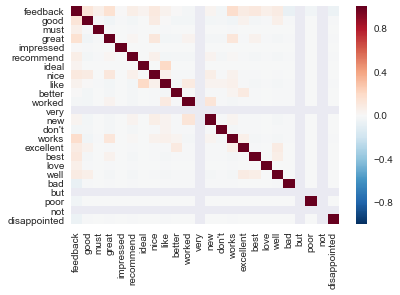

In [112]:
sns.heatmap(review_raw.corr())

In [113]:
# set holdout group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
bnb.score(X_test, y_test)

0.61515151515151512

In [114]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb, data,target, cv=5)
scores 

array([ 0.64 ,  0.605,  0.615,  0.59 ,  0.59 ])

In [115]:
# import nltk
# from nltk.corpus import stopwords



In [116]:
accuracy = 1-(target != y_pred).sum()/data.shape[0] #calculate accuracy rate
'{:.2%}'.format(accuracy)


'61.60%'

In [117]:
from collections import Counter
Counter(" ".join(review_raw["message"]).split()).most_common(100)

[('phone', 118),
 ('good', 66),
 ('great', 63),
 ('works', 43),
 ('battery', 39),
 ('sound', 35),
 ('one', 34),
 ('quality', 33),
 ('phone.', 33),
 ('would', 32),
 ('headset', 32),
 ('it.', 31),
 ('like', 30),
 ("i've", 28),
 ("don't", 28),
 ('use', 27),
 ("it's", 27),
 ('product', 27),
 ('really', 26),
 ('recommend', 24),
 ('-', 24),
 ('work', 23),
 ('get', 22),
 ("i'm", 22),
 ('excellent', 21),
 ('product.', 21),
 ('well', 20),
 ('love', 20),
 ('ear', 19),
 ('best', 19),
 ('nice', 19),
 ('2', 19),
 ('also', 19),
 ('even', 18),
 ('worked', 18),
 ('better', 18),
 ('great.', 17),
 ('bought', 17),
 ('new', 17),
 ('could', 16),
 ("doesn't", 16),
 ('car', 15),
 ('time', 15),
 ('first', 15),
 ('well.', 15),
 ('case', 15),
 ('bluetooth', 15),
 ('buy', 15),
 ('easy', 15),
 ('charger', 14),
 ('comfortable', 14),
 ('still', 14),
 ('happy', 14),
 ('waste', 13),
 ('two', 13),
 ('quality.', 13),
 ('reception', 13),
 ('got', 13),
 ('worst', 13),
 ('ever', 13),
 ('hear', 12),
 ('make', 12),
 ('enoug